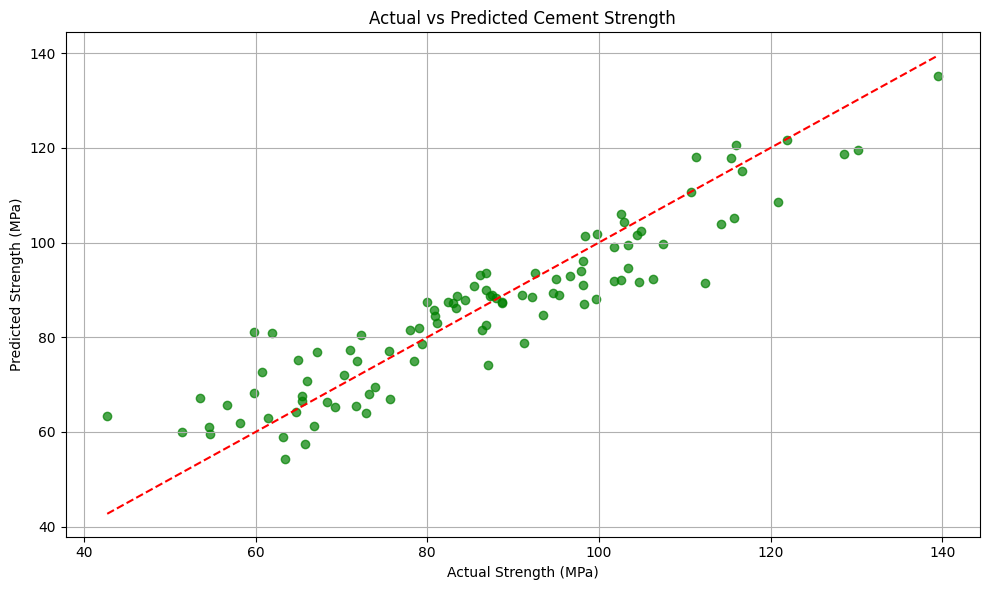

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load model
model = pickle.load(open("model.pkl", "rb"))

# Load data
df = pd.read_csv("cement_data_large.csv")
X = df.drop("Compressive Strength", axis=1)
y = df["Compressive Strength"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Prediction
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Cement Strength")
plt.grid(True)
plt.tight_layout()
plt.savefig("prediction_comparison.png")
plt.show()